In [22]:
import numpy as np
from numpy import nan as Nan
import pandas as pd
import matplotlib.pyplot as plt 
df1=pd.read_csv('Muestras-Daniel/Encender.csv')
columns=['Acx','Acy','Acz','Gx','Gy','Gz']
nans=pd.Series([Nan,Nan,Nan,Nan,Nan,Nan])

In [23]:
gesto1=df1[(df1.index>=1)&(df1.index<185)].astype(float)

In [24]:
def fourier(datos,f_value):
    x=np.fft.rfft(datos,axis=0)
    ones=np.ones(f_value)
    zeros=np.zeros(x.shape[0]-f_value)
    c=np.concatenate((ones,zeros))
    clean=x*c.reshape(x.shape[0],1)
    x=np.fft.irfft(clean,axis=0)
    return x

def resampler(data,lim_inf,lim_sup):
    x=data.copy()
    a=x[lim_inf:lim_sup,:]
    busqueda=185-a.shape[0]
    razon=(a.shape[0]/busqueda)
    g = np.flip(np.arange(1,a.shape[0],razon),0)
    g=g.astype('int')
    copy = a.copy()

    for i in g:
      aux1=copy[i]
      aux2=copy[i-1]
      valor=(aux1+aux2)/2
      copy=np.insert(copy,i,valor,axis=0)

    plt.plot(copy)
    plt.show()
    return copy

def save(data, name: str):
    df = pd.DataFrame(data=data, columns=columns)
    df_prime = pd.concat([df, pd.DataFrame([[np.nan] * df.shape[1]], columns=df.columns)], ignore_index=True)
    try:   
        df = pd.read_csv(name)
        df = df.append(df_prime, ignore_index=True)
        print('Read csv sucesfully')
    except:
        df=df_prime
        print('creating new csv')
    df.to_csv(name, index=False)

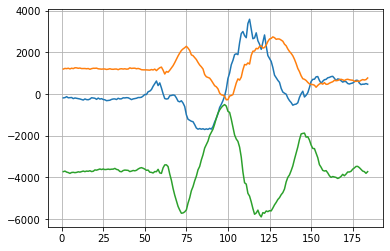

In [25]:
plt.plot(gesto1[['Acx','Acy','Acz']])
a=gesto1[columns].to_numpy()
plt.grid(True)
plt.show()

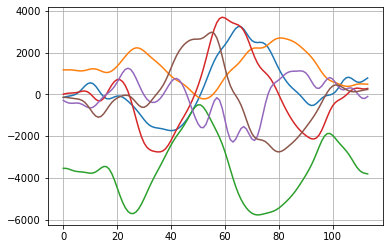

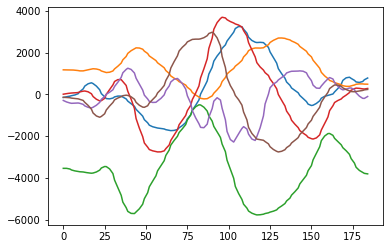

In [41]:
lim_inf=46
lim_sup=160
x=fourier(a,25)
plt.plot(x[lim_inf:lim_sup,:])
plt.grid(True)
plt.show()
final=resampler(x,lim_inf,lim_sup)

In [42]:
print(final.shape)

(185, 6)


In [43]:
save(final,'ejemplo.csv')

Read csv sucesfully
